# Παράξενες Συστάδες

Περιλαμβάνει υλικό από την τεκμηρίωση του scikit-learn στο <https://scikit-learn.org/stable/>.

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Ο αλγόριθμος k-means προϋποθέτει, εκτός από το ότι η διακύμανση των διαφορετικών διαστάσεων των δεδομένων να μην διαφέρει πολύ, ότι οι συστάδες είναι *ισοτροπικές* (isotropic).

* Αυτό σημαίνει ότι έχουν ένα σφαιρικό σχήμα (στον χώρο που μπορούν να αναπαρασταθούν).

* Αν αυτό δεν συμβαίνει, τότε ο αλγόριθμος μπορεί να μην δουλέψει πολύ καλά.

* Για να το δούμε αυτό, ας κατασκευάσουμε τρεις συστάδες.

<AxesSubplot:>

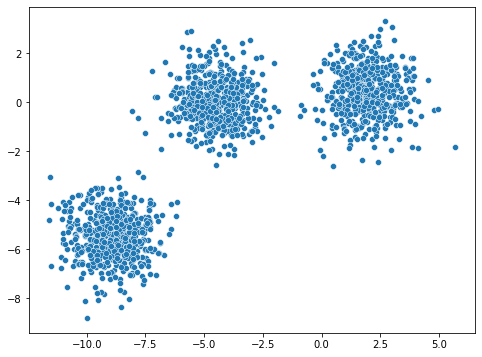

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

n_samples = 1500
random_state = 170
X, _ = make_blobs(n_samples=n_samples, random_state=random_state)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1])

* Ο αλγόριθμος k-means θα δουλέψει άψογα.

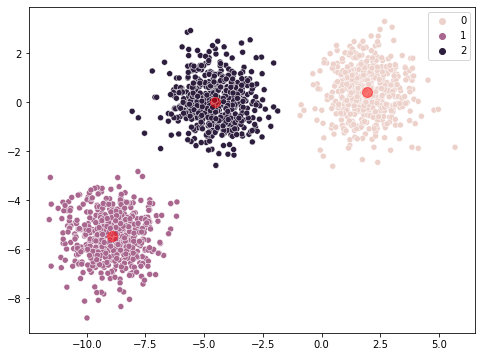

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=100, alpha=0.5)

* Θα τις κάνουμε ανισοτροπικές.

<AxesSubplot:>

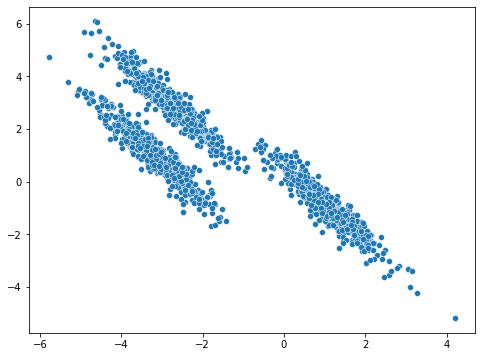

In [3]:
import numpy as np

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1])

* Προσέξτε ότι, παρότι είναι ανισοτροπικές, οι τυπικές αποκλίσεις τους (και άρα και οι διακυμάνσεις) δεν είναι πολύ διαφορετικές.

In [4]:
X_aniso.std(axis=0)

array([2.02019173, 1.86325317])

* Πλην όμως, τα αποτελέσματα του k-means σε αυτά τα δεδομένα απέχουν πολύ από αυτό που θα θέλαμε.

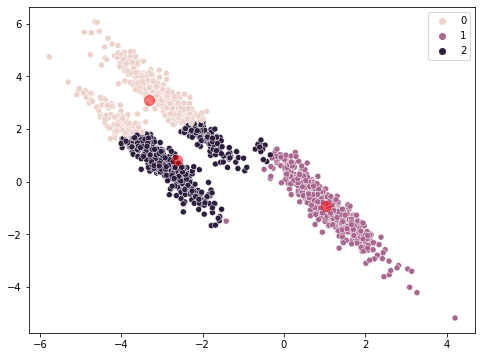

In [5]:
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_aniso)
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=100, alpha=0.5)

* Και η χρήση του `StandardScaler` δεν θα αλλάξει την κατάσταση.

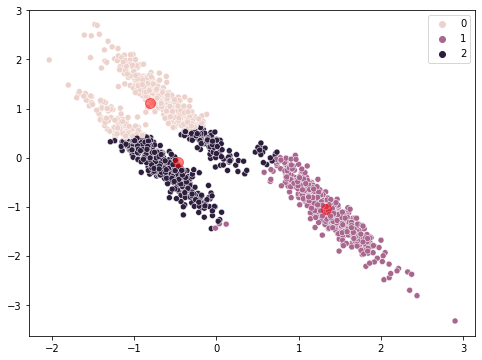

In [6]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_aniso_scaled = standard_scaler.fit_transform(X_aniso)
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_aniso_scaled)
sns.scatterplot(x=X_aniso_scaled[:, 0], y=X_aniso_scaled[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=100, alpha=0.5)

* Σε τέτοιες περιπτώσεις, μπορούμε να χρησιμοποιήσουμε έναν άλλο αλγόριθμο συσταδοποίησης, όπως ένα Μοντέλο Μίξης Γκαουσιανών (Gaussian Mixture Model).

In [7]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=20, 
                      random_state=0)
y_pred = gmm.fit_predict(X_aniso)

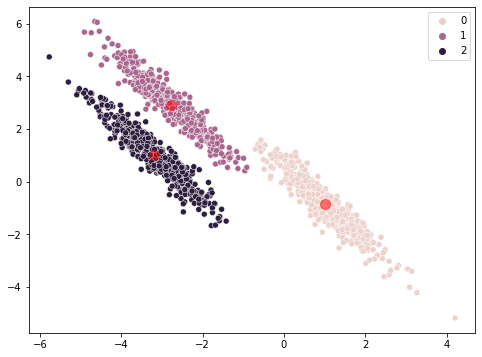

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1], hue=y_pred)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, alpha=0.5)

* Ένα διαφορετικού είδους πρόβλημα εμφανίζεται όταν τα δεδομένα δεν είναι κυρτά (convex).

<AxesSubplot:>

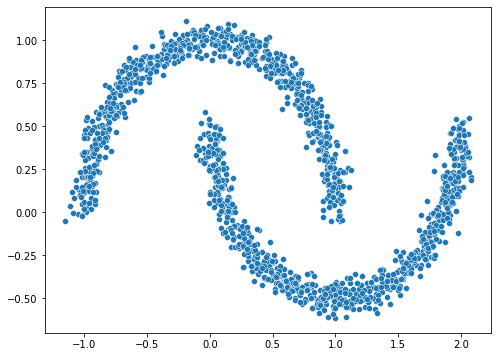

In [9]:
from sklearn.datasets import make_moons

plt.figure(figsize=(8, 6))
X_moons, _ = make_moons(n_samples=1500, noise=.05)
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1])

* Ο αλγόριθμός k-means δεν δουλεύει καλά σε αυτήν την περίπτωση.

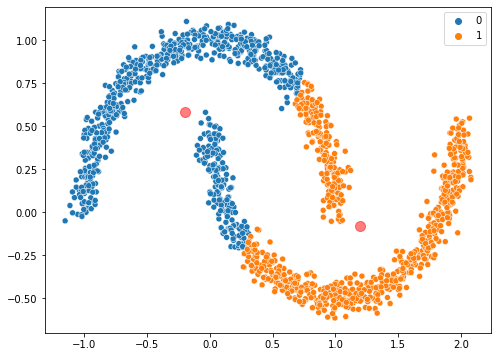

In [10]:
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred = kmeans.fit_predict(X_moons)
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, alpha=0.5)

* Δυστυχώς όμως, ούτε και ένα Μοντέλο Γκαουσιανής Μίξης.

In [11]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full', max_iter=20, 
                      random_state=0)
y_pred = gmm.fit_predict(X_moons)

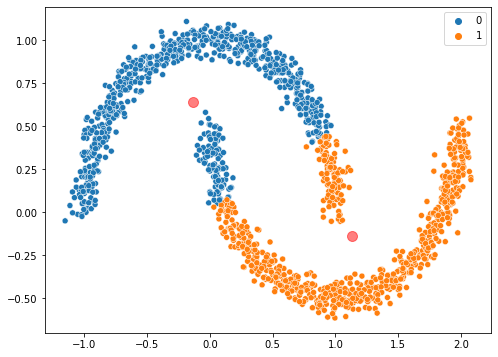

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_pred)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, alpha=0.5)

* Σε τέτοιες περιπτώσεις, μπορούμε να δοκιμάσουμε μια άλλη μέθοδο, τη φασματική συσταδοποίηση (spectral clustering).

* Η μέθοδος λειτουργεί δημιουργώντας έναν γράφο, όπου οι παρατηρήσεις μας είναι οι κόμβοι και οι σύνδεσμοι είναι οι γείτονές τους.

* Στον παρακάτω κώδικα παίρνουμε μία προειδοποίηση επειδή ο γράφος δεν είναι διασυνδεδεμένος, αφού τα δύο μισοφέγγαρα δεν συνδέονται μεταξύ τους, την οποία μπορούμε να αγνοήσουμε.

In [13]:
from sklearn.cluster import SpectralClustering

scm = SpectralClustering(n_clusters=2, 
                         affinity='nearest_neighbors',
                         n_neighbors=10,
                         n_init=20,
                         assign_labels='kmeans',
                         random_state=0)
y_pred = scm.fit_predict(X_moons)

C:\Users\Christos\Anaconda3\envs\py39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<AxesSubplot:>

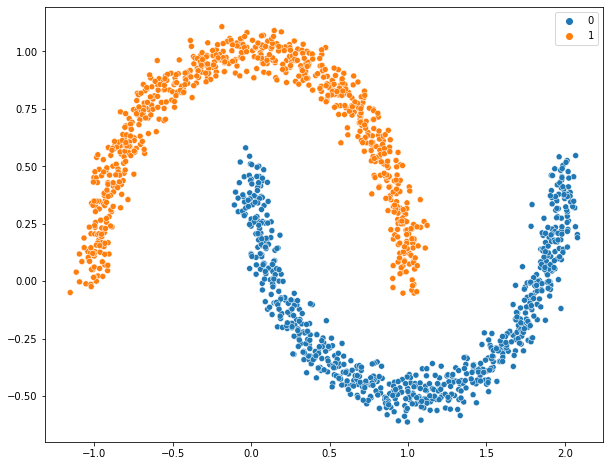

In [14]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_pred)

* Το scikit-learn προσφέρει και άλλες μεθόδους συσταδοποίησης.

* Μπορείτε να δείτε τη σχετική τεκμηρίωση στο https://scikit-learn.org/stable/modules/clustering.html. 